# Schrodinger Solver

In [ ]:
%matplotlib notebook
import sys
ver=sys.version_info.major
if ver==2:
    from utils2 import *
elif ver==3:
    from utils3 import *
else:
    print("Python version not recognized. Python 2.5 or greater required.")
import numpy as np

## Note about units
We will be using atomic units throughout.

In [ ]:
# atomic units
hbar=1.0
m=1.0
#set precision of numerical approximation
steps=2000

## Particle in Harmonic Well


*******************************************************************************
                           Schrodinger Solver Output
                        Matthew Srnec and Shiv Upadhyay
*******************************************************************************
                          Particle in a harmonic well

		Input:
                             Force Constant : 0.5
                                   Depth : 2

		4 lowest Bound States:
                              E(0)=-1.75001841106
                              E(1)=-1.25038437598
                             E(2)=-0.753988551576
                             E(3)=-0.278886416802
*******************************************************************************



<IPython.core.display.Javascript object>


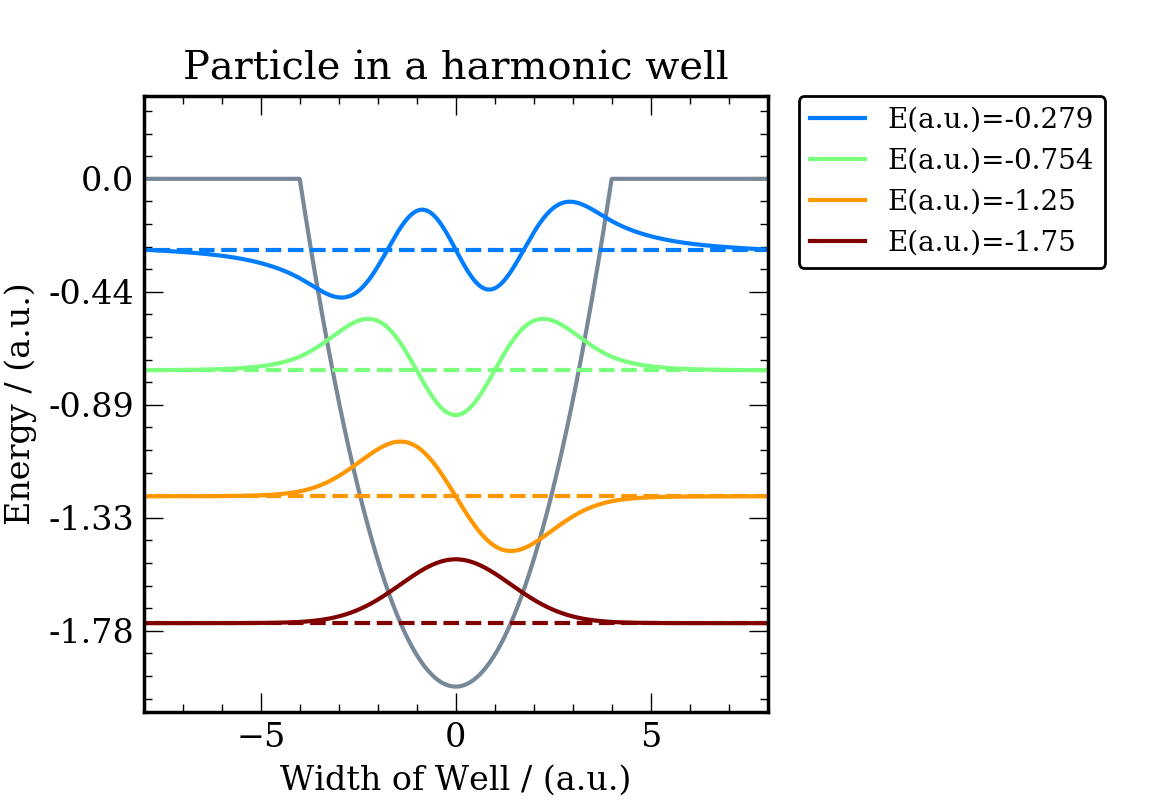

In [5]:
########
# PARTICLE IN A HARMONIC WELL OF DEPTH (D) WITH A FORCE CONSTANT (omega)
########
Case=5
########
# INPUT
########
# set force constant and depth of harmonic well
omega=0.5 # this value must be between 0.3 and 1.4
D=2 # this value must be between 2 and 15
########
# CODE
########
# divide by two so a well from -W to W is of input width
W=np.sqrt(np.abs(2.0*-D)/(omega**2))
# set length variable for xvec
A=W*2.0
# create x-vector from -A to A
xvec=np.linspace(-A,A,steps,dtype=np.float_)
# get step size
h=xvec[1]-xvec[0]
# create the potential from harmonic potential function
U=harmonic_potential(xvec,omega,-D)
# create Laplacian via 3-point finite-difference method
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
    +np.diag(np.ones(steps-1),-1))/(float)(h**2)
# create the Hamiltonian
Hamiltonian=np.zeros((steps,steps))
[i,j] = np.indices(Hamiltonian.shape)
Hamiltonian[i==j]=U
Hamiltonian+=(-0.5)*((hbar**2)/m)*Laplacian
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E,V=diagonalize_hamiltonian(Hamiltonian)
# determine theoretical number of energy levels (n)
n=0
while E[n]<0:
    n+=1
# print output
output(Case,['Force Constant','Depth'],[omega,D],E,n)
# create plot
finite_well_plot(E,V,xvec,steps,n,Case,U)